In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
data = pd.read_csv('HR_Engagement_Sat_Sales_UpdatedV4.0.csv')

## Desafio 1

In [3]:
data.head()

##visualizar o DataFrame

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,...,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,...,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,...,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,...,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,...,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,...,5,3,5,1,2,5,4,3149,80,10


In [4]:
data.info() 
##encontrar os dados não nulos e seus respectivos tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

In [5]:
data['GEO'].value_counts()
##quantidade de integrantes de cada país

UK           1772
France       1699
Korea        1685
Japan        1669
China        1667
Colombia     1659
Turkey       1639
US           1632
Australia    1577
Name: GEO, dtype: int64

In [6]:
data['Role'].value_counts()
##os tipos de cargos e quais são mais ocupados

Level 2-4          6889
Level 1            3270
Manager            2420
Senior Manager     1320
Director            660
Senior Director     330
VP                  110
Name: Role, dtype: int64

In [7]:
data['Talent_Level'].value_counts()
## retirando coluna com valores repitidos do DataFrame

6    14999
Name: Talent_Level, dtype: int64

In [8]:
data['Critical'].value_counts()
## retirando coluna com valores nulos do DataFrame

1.0    480
Name: Critical, dtype: int64

In [9]:
data['Trending Perf'].value_counts()                  
## retirando coluna com valores repitidos do DataFrame

3    14999
Name: Trending Perf, dtype: int64

In [10]:
data['Talent_Level'].value_counts()
## retirando coluna com valores repitidos do DataFrame

6    14999
Name: Talent_Level, dtype: int64

In [11]:
data['Validated_Talent_Level'].value_counts()
## retirando coluna com valores repitidos do DataFrame

6    14999
Name: Validated_Talent_Level, dtype: int64

In [12]:
data['Percent_Remote'].value_counts()
##Analisando os valores desta coluna

0.8    7853
0.4    6022
0.5    1112
1.0      12
Name: Percent_Remote, dtype: int64

In [13]:
data['last_evaluation'].value_counts()
##Analisando os valores desta coluna

0.55    358
0.50    353
0.54    350
0.51    345
0.57    333
       ... 
0.39     52
0.43     50
0.38     50
0.44     44
0.36     22
Name: last_evaluation, Length: 65, dtype: int64

In [14]:
data['CSR Factor'].value_counts()
## retirando coluna com valores nulos do DataFrame

5.0    1713
Name: CSR Factor, dtype: int64

In [15]:
data['promotion_last_5years'].value_counts()
## retirando coluna com valores repitidos do DataFrame

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [16]:
data['Emp_Identity'].value_counts()
##Analisando os valores desta coluna

2    6396
1    4425
4    2067
3    1961
5     150
Name: Emp_Identity, dtype: int64

In [17]:
data['Emp_Role'].value_counts()
##Analisando os valores desta coluna

2    6490
1    4498
3    1937
4    1917
5     157
Name: Emp_Role, dtype: int64

In [18]:
data['Emp_Position'].value_counts()
##Analisando os valores desta coluna

2    7025
1    4518
3    2490
4     894
5      72
Name: Emp_Position, dtype: int64

In [19]:
data['Emp_Title'].value_counts()
##Analisando os valores desta coluna

2    6971
1    4570
3    2535
4     883
5      40
Name: Emp_Title, dtype: int64

In [20]:
data['Sensor_StepCount'].value_counts()
##Analisando os valores desta coluna

1150    15
1145    14
1660    13
1758    13
1518    12
        ..
8168     1
2027     1
8184     1
6151     1
2049     1
Name: Sensor_StepCount, Length: 4970, dtype: int64

In [21]:
data['Sensor_Heartbeat(Average/Min)'].value_counts()
##Analisando os valores desta coluna

75    1363
79    1229
77    1191
80    1173
78    1162
76    1145
85     728
89     678
90     666
87     665
88     644
86     638
73     432
71     426
72     425
74     420
70     391
60     177
61     168
66     168
65     164
64     162
67     161
62     161
63     161
69     158
68     143
Name: Sensor_Heartbeat(Average/Min), dtype: int64

In [22]:
data['Men_Leave']
##vizualização para verificar distribuição de dados

0        1.0
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
14994    NaN
14995    NaN
14996    NaN
14997    1.0
14998    NaN
Name: Men_Leave, Length: 14999, dtype: float64

In [23]:
data['Women_Leave']
##vizualização para verificar distribuição de dados

0        NaN
1        0.0
2        1.0
3        NaN
4        1.0
        ... 
14994    1.0
14995    1.0
14996    1.0
14997    NaN
14998    0.0
Name: Women_Leave, Length: 14999, dtype: float64

*Aparementemente as colunas se referem individualmente a saída de mulheres e homens. Irei uni-las em uma só coluna para compensar os dados ausentes em ambas. Para isso converterei os dados ausentes para 0 nas duas colunas e somarei elas em uma coluna de nome 'Leave'.*

In [24]:
ML = data['Men_Leave'].fillna(0)
##Instânciando a coluna Man_Leave

In [25]:
WL = data['Women_Leave'].fillna(0)
##Instânciando a coluna Women_Leave

In [26]:
data['Leave'] = ML + WL
##Criando coluna Leave

In [27]:
data['left_Company'].value_counts()
##Desconsiderando este dado de saída

0    11428
1     3571
Name: left_Company, dtype: int64

In [28]:
data['Leave'].value_counts()
##Considerando este dado de saída, pois foi baseado na saída indivual do número de homens e de mulheres

1.0    9796
0.0    5203
Name: Leave, dtype: int64

Agora criarei uma coluna que se baseará nos na média dos valores das linhas das colunas de Engagement(5 colunas), Emp_Competitive, Emp_Collaborative, Emp_Work, EMP_Sat_OnPrem, EMP_Sat_Remote.

**Serão estas:**

EMP_Engagement_mean

Emp_Competitive_mean

Emp_Collaborative_mean

Emp_Work_mean

EMP_Sat_OnPrem_mean

EMP_Sat_Remote_mean

In [29]:
data['EMP_Engagement_mean'] = data[["EMP_Engagement_1", "EMP_Engagement_2", "EMP_Engagement_3", "EMP_Engagement_4", "EMP_Engagement_5"]].mean(axis=1)

In [30]:
data['Emp_Competitive_mean'] = data[["Emp_Competitive_1", "Emp_Competitive_2", "Emp_Competitive_3", "Emp_Competitive_4", "Emp_Competitive_5"]].mean(axis=1)

In [31]:
 data['Emp_Collaborative_mean'] = data[["Emp_Collaborative_1", "Emp_Collaborative_2", "Emp_Collaborative_3", "Emp_Collaborative_4", "Emp_Collaborative_5"]].mean(axis=1)

In [32]:
data['Emp_Work_mean'] = data[['Emp_Work_Status2','Emp_Work_Status_3','Emp_Work_Status_4','Emp_Work_Status_5']].mean(axis=1)

In [33]:
data['EMP_Sat_OnPrem_mean'] = data[['EMP_Sat_OnPrem_1' , 'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4', 'EMP_Sat_OnPrem_5']].mean(axis=1)

In [34]:
data['EMP_Sat_Remote_mean'] = data[['EMP_Sat_Remote_1', 'EMP_Sat_Remote_2', 'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5']].mean(axis=1)

In [35]:
data['EMP_Sat_OnPrem_mean'].fillna(0)
##Para retirar os valores nulos desta coluna e converte-los para zero

0        3.6
1        3.6
2        3.6
3        3.6
4        3.6
        ... 
14994    0.0
14995    0.0
14996    0.0
14997    0.0
14998    0.0
Name: EMP_Sat_OnPrem_mean, Length: 14999, dtype: float64

A seguir, irei alterar o tipo de dado nas colunas de 'Department', 'GEO', 'Role', 'sales', 'salary' e 'Gender' para numeral. Isto irá transformar dados que estão como objetos em int, assim possibilitando uma análise com o máximo possível de dados.

In [36]:
label_encoder = LabelEncoder()

In [37]:
set(data['Department'])

{'Finance', 'Human Resources', 'IT', 'Operations', 'Sales', 'Warehouse'}

In [38]:
data['Department'] = label_encoder.fit_transform(data['Department'])

In [39]:
data['GEO'] = label_encoder.fit_transform(data['GEO'])

In [40]:
data['Role'] = label_encoder.fit_transform(data['Role'])

In [41]:
data['sales'] = label_encoder.fit_transform(data['sales'])

In [42]:
data['salary'] = label_encoder.fit_transform(data['salary'])

In [43]:
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [44]:
data.columns
##Para vizualizar todas as informações do DataFrame e filtrar as necessárias.

Index(['ID', 'Name', 'Department', 'GEO', 'Role', 'Rising_Star',
       'Will_Relocate', 'Critical', 'Trending Perf', 'Talent_Level',
       'Validated_Talent_Level', 'Percent_Remote', 'EMP_Sat_OnPrem_1',
       'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4',
       'EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_1', 'EMP_Sat_Remote_2',
       'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5',
       'EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3',
       'EMP_Engagement_4', 'EMP_Engagement_5', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left_Company', 'CSR Factor', 'promotion_last_5years',
       'sales', 'salary', 'Gender', 'LinkedIn_Hits', 'Emp_Work_Status2',
       'Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5',
       'Emp_Identity', 'Emp_Role', 'Emp_Position', 'Emp_Title', 'Women_Leave',
       'Men_Leave', 'Emp_Competitive_1', 'Emp_Competitive_2',
       'Emp_Competitive_3',

'Sensor_Heartbeat(Average/Min)', 'Sensor_StepCount', 'Emp_Title' , 'Emp_Position', 'Emp_Role', 'Emp_Identity', 'Gender', 'salary', 'sales', 'last_evaluation', 'EMP_Sat_Remote_mean', 'EMP_Sat_OnPrem_mean' ,'Percent_Remote' ,'Emp_Work_mean' ,'Role' , 'GEO' ,'Department', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'LinkedIn_Hits', 'Leave', 'EMP_Engagement_mean', 'Emp_Competitive_mean', 'Emp_Collaborative_mean'

**Estes são os dados de análise que irei analisar separadamente em outro DataFrame para testar sua correlação e efeitos uns nos outros**

In [45]:
filtro = ['Sensor_Heartbeat(Average/Min)', 'Sensor_StepCount', 'Emp_Title' , 'Emp_Position', 'Emp_Role', 'Emp_Identity', 'Gender', 'salary', 'sales', 'last_evaluation', 'EMP_Sat_Remote_mean', 'EMP_Sat_OnPrem_mean' ,'Percent_Remote' ,'Emp_Work_mean' ,'Role' , 'GEO' ,'Department', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'LinkedIn_Hits', 'Leave', 'EMP_Engagement_mean', 'Emp_Competitive_mean', 'Emp_Collaborative_mean']

In [46]:
dataFilt = data.filter(items = filtro)

In [47]:
dataFilt
##Vizualização do novo DataFrame

,Sensor_Heartbeat(Average/Min),Sensor_StepCount,Emp_Title,Emp_Position,Emp_Role,Emp_Identity,Gender,salary,sales,last_evaluation,...,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Leave,EMP_Engagement_mean,Emp_Competitive_mean,Emp_Collaborative_mean
0,61,1841,1,2,1,1,1,1,7,0.36,...,3,168,3,1,0,5,1.0,4.2,2.4,2.4
1,90,1990,1,2,1,2,0,1,2,0.36,...,5,159,2,0,0,58,0.0,4.2,2.0,3.2
2,80,3193,2,2,1,1,0,2,6,0.36,...,2,282,3,0,0,42,1.0,4.2,2.8,3.2
3,77,3248,1,2,1,2,1,0,6,0.36,...,4,278,4,1,0,37,1.0,4.2,2.0,2.4
4,80,3149,1,2,1,1,0,1,7,0.36,...,6,256,5,0,0,6,1.0,4.2,2.8,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,88,1538,1,2,1,2,0,2,9,1.00,...,4,252,5,0,0,1,1.0,1.8,1.8,2.4
14995,89,1247,1,2,2,1,0,2,9,1.00,...,4,232,5,0,0,6,1.0,1.8,3.0,3.6
14996,88,1155,1,2,1,1,0,1,7,1.00,...,5,242,5,0,0,4,1.0,1.8,2.2,3.6
14997,86,1210,1,1,2,1,1,2,2,1.00,...,5,223,6,0,0,2,1.0,1.8,2.0,2.4


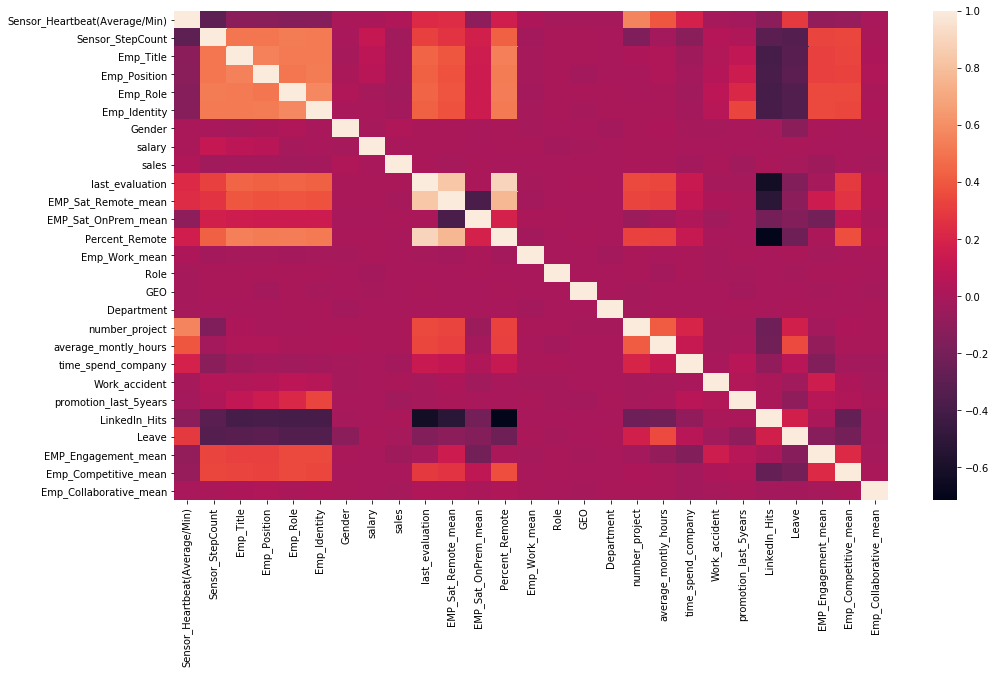

In [48]:
plt.figure(figsize=(16,9))
sns.heatmap(dataFilt.corr())
##Um mapa de calor para indicar a correlação entre as variáveis.

No mapa de calor acima podemos concluir que os dados das colunas 'Role', 'GEO', 'Department', 'Validated_Talent_Level', 'Emp_Work_mean', 'Emp_Collaborative_mean' e 'sales' não são influenciados ou influenciam os outros dados, pois, como podemos visualizar pelas cores, sua correlação é constante (exceto quando relacionados consigo mesmos).

Podemos estabelecer também associações de determinados dados com outros, como a média de horas mensais e a saída de funcionários, engajamento dos funcionários e os cargos, entre outras correlações. Logo, esses dados podem ser manipulados no mundo real de forma que possamos ajustar os valores para que atenda as exigências.

## Desafio 2

Vamos treinar e testar dados que influenciam na saída de funcionários para avaliarmos como resolver esta questão. Para isso dividiremos os dados a princípio em dois, X e y.

In [49]:
X = dataFilt[[ 'Sensor_StepCount', 'Emp_Title' , 'Emp_Position', 'Emp_Role', 'Emp_Identity', 'Gender', 'salary', 'sales', 'last_evaluation', 'EMP_Sat_Remote_mean', 'Percent_Remote' ,'Emp_Work_mean' ,'Role' , 'GEO' ,'Department', 'number_project', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'LinkedIn_Hits', 'Emp_Competitive_mean', 'Emp_Collaborative_mean']]
y = dataFilt['EMP_Engagement_mean']

In [50]:
from sklearn.model_selection import train_test_split
##Dividindo os dados em teste e treino

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
from sklearn.linear_model import LinearRegression
## Importando do LinearRegression do sklearn_model

In [53]:
lm = LinearRegression()
##Instanciando de modelo linear

In [54]:
lm.fit(X_train,y_train)
##treianando modelos

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(lm.coef_)
##coeficientes do modelo

[ 8.99297027e-05  2.16783561e-01  2.41500038e-01  2.54930383e-01
  2.59604056e-01  4.45746388e-03 -6.44889299e-02 -2.58331278e-03
 -1.19190208e+00  5.49972011e-01 -4.24226361e+00  1.01324739e-02
  9.36124983e-03 -3.51204491e-04 -1.31625029e-03  1.36713489e-01
  5.10184419e-04  2.65683607e-01 -9.56174046e-01  6.05263244e-04
  1.64355583e-01 -5.43784013e-03]


In [56]:
predictions = lm.predict( X_test)
##Prevendo o conjunto X_test dos dados

Text(0, 0.5, 'predictions')

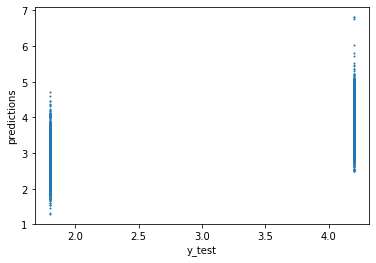

In [57]:
plt.scatter(y_test, predictions, s = 1, )
plt.xlabel('y_test')
plt.ylabel('predictions')
##Para indicar a correlação entre a predição e o y_test

In [58]:
##Avaliando o modelo

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.611209370939974
MSE: 0.5907028253850215
RMSE: 0.7685719389784027


In [59]:
##Interpretando o coeficiente
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Sensor_StepCount,0.000090
Emp_Title,0.216784
Emp_Position,0.241500
Emp_Role,0.254930
Emp_Identity,0.259604
Gender,0.004457
salary,-0.064489
sales,-0.002583
last_evaluation,-1.191902
EMP_Sat_Remote_mean,0.549972


## Interpretando:
    
A partir dessa análise podemos estabelecer que variáveis como Emp_Title e Emp_Role influenciam em um engajamento positivo, mas por se tratar de cargos e títulos, são dificilmente manipulaveis pela empresa, pois pode gerar gastos. Um dado que impacta positivamente no engajamento é o número de projetos, que o incentiva em 0,13. Além disso, o Emp_Competitive_mean incentiva em 0,16. Como essas variáveis são bem mais facilmente controladas pela empresa, o modelo indica que para melhorar o engajamento dos funcionários a corporação pode investir na criação de projetos que promovam a uma competitividade saudável entre seus colaboradores.